In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy.spatial import distance
from pathlib import Path

In [2]:
dir = Path.cwd()
data_path = dir / 'data'
data_path.as_uri()

'file:///Users/craigbosco/github/kaggle/nfl_bdb_2023/data'

In [3]:
games = pd.read_csv(data_path / 'games.csv')
print(games.shape)
games.head()

(122, 7)


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


In [4]:
scouting = pd.read_csv(data_path / 'pffScoutingData.csv')
print(scouting.shape)
scouting.head()

(188254, 15)


,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0


In [5]:
players = pd.read_csv(data_path / 'players.csv')
print(players.shape)
players.head()

(1679, 7)


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


In [26]:
qbs = players.loc[players['officialPosition'] == 'QB']
qbs.head(20)

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick
7,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
11,33138,6-3,222,1985-07-02,Michigan,QB,Chad Henne
12,33241,6-3,219,05/15/1986,San Diego,QB,Josh Johnson
14,34452,6-3,220,1988-02-07,Georgia,QB,Matthew Stafford
21,34843,6-2,215,1985-10-13,Michigan State,QB,Brian Hoyer
51,37083,6-4,235,1989-10-15,Missouri,QB,Blaine Gabbert


In [7]:
plays = pd.read_csv(data_path / 'plays.csv')
print(plays.shape)
plays.head()

(8558, 32)


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [8]:
week1 = pd.read_csv(data_path / 'week1.csv')
print(week1.shape)
week1.head()

(1118122, 16)


,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [9]:
week1.dtypes

gameId             int64
playId             int64
nflId            float64
frameId            int64
time              object
jerseyNumber     float64
team              object
playDirection     object
x                float64
y                float64
s                float64
a                float64
dis              float64
o                float64
dir              float64
event             object
dtype: object

In [10]:
print(week1.event.unique())

['None' 'ball_snap' 'autoevent_passforward' 'pass_forward'
 'autoevent_ballsnap' 'line_set' 'play_action' 'pass_arrived'
 'autoevent_passinterrupted' 'fumble' 'fumble_offense_recovered' 'qb_sack'
 'run' 'man_in_motion' 'pass_outcome_caught' 'pass_outcome_incomplete'
 'pass_tipped' 'qb_strip_sack' 'shift' 'first_contact'
 'huddle_break_offense' 'lateral' 'handoff']


In [11]:
unique_games = week1.gameId.value_counts()
unique_games

2021090900    92644
2021091300    92299
2021091204    82271
2021091201    76406
2021091205    75739
2021091212    72266
2021091203    71116
2021091200    69299
2021091202    68172
2021091209    65274
2021091208    64653
2021091206    63917
2021091207    63848
2021091213    57799
2021091210    54096
2021091211    48323
Name: gameId, dtype: int64

In [53]:
pid = 693
gid = 2021091204

one_play = week1.loc[(week1['playId'] == pid) & (week1['gameId'] == gid)]
one_play.head(20)

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
386262,2021091204,693,41251.0,1,2021-09-12T17:31:55.400,2.0,SF,left,49.42,9.07,0.01,0.01,0.00,81.10,88.12,None
386263,2021091204,693,41251.0,2,2021-09-12T17:31:55.500,2.0,SF,left,49.42,9.07,0.00,0.01,0.00,81.84,98.18,None
386264,2021091204,693,41251.0,3,2021-09-12T17:31:55.600,2.0,SF,left,49.42,9.06,0.00,0.01,0.00,81.84,106.73,None
386265,2021091204,693,41251.0,4,2021-09-12T17:31:55.700,2.0,SF,left,49.42,9.06,0.00,0.00,0.00,81.84,106.39,None
386266,2021091204,693,41251.0,5,2021-09-12T17:31:55.800,2.0,SF,left,49.41,9.06,0.00,0.00,0.01,80.36,113.24,None
386267,2021091204,693,41251.0,6,2021-09-12T17:31:55.900,2.0,SF,left,49.40,9.05,0.00,0.00,0.01,79.72,169.88,ball_snap
386268,2021091204,693,41251.0,7,2021-09-12T17:31:56.000,2.0,SF,left,49.40,9.04,0.00,0.00,0.01,78.72,196.54,None
386269,2021091204,693,41251.0,8,2021-09-12T17:31:56.100,2.0,SF,left,49.38,9.04,0.00,0.01,0.02,78.72,228.46,None
386270,2021091204,693,41251.0,9,2021-09-12T17:31:56.200,2.0,SF,left,49.37,9.04,0.02,0.35,0.01,78.72,242.41,None
386271,2021091204,693,41251.0,10,2021-09-12T17:31:56.300,2.0,SF,left,49.35,9.03,0.12,1.13,0.02,79.99,250.50,None


In [54]:
play_outcome = plays.loc[(plays['playId'] == pid) & (plays['gameId'] == gid)]
play_outcome.playDescription.values

array(['(4:04) J.Goff sacked at 50 for -10 yards (K.Street).'],
      dtype=object)

In [52]:
sack_play = week1.loc[(week1['event'] == 'qb_sack') & (week1['gameId'] == gid)]
sack_play.playId.unique()

array([ 693, 1775, 3100, 3255])

<AxesSubplot:xlabel='x', ylabel='y'>

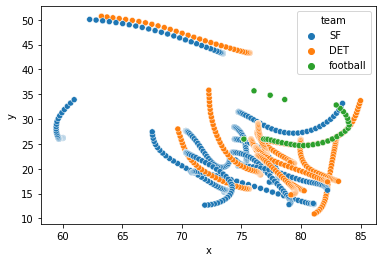

In [14]:
sns.scatterplot(x='x', y='y', hue=one_play['team'], data=one_play)

In [22]:
one_play.frameId.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [25]:
one_play.event.unique()

array(['None', 'ball_snap', 'play_action', 'pass_forward',
       'autoevent_passforward'], dtype=object)

In [30]:
scout_report_forplay = scouting.loc[(scouting['playId'] == pid) & (scouting['gameId'] == gid)]
scout_report_forplay

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
8778,2021091204,90,41251,Coverage,RCB,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8779,2021091204,90,41256,Coverage,FS,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8780,2021091204,90,42360,Pass Rush,DLT,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,2021091204,90,42389,Coverage,SCBR,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8782,2021091204,90,43090,Pass Route,RWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8783,2021091204,90,43290,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8784,2021091204,90,43453,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,45011.0,PA,0.0
8785,2021091204,90,43584,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8786,2021091204,90,44947,Pass Route,HB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8787,2021091204,90,45011,Pass Rush,NT,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='x', ylabel='y'>

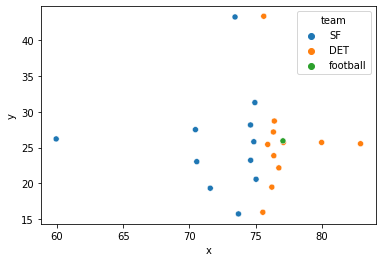

In [33]:
one_frame = one_play.loc[one_play['frameId'] == 9]
sns.scatterplot(x='x', y='y', hue=one_play['team'], data=one_frame)

In [16]:
def get_distance_for_players(frame_data):
    for

SyntaxError: invalid syntax (3289609007.py, line 2)

In [ ]:
import distance